# TITANIC

In [668]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import linear_model
import random
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score

#### importer le fichier .csv

In [669]:
pwd

'C:\\Users\\arlette\\Documents\\KAGGLE TITANIC'

In [670]:
df_titanic=pd.read_csv('train.csv', sep=',', header=0)
tx_titanic=pd.read_csv('test.csv', sep=',', header=0)
df_titanic.head(2)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


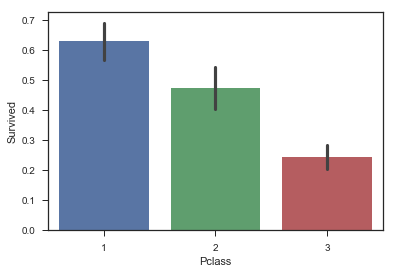

In [671]:
#la probabilité de survie par rapport à la classe occupée
sns.barplot(x="Pclass",y="Survived", data=df_titanic)

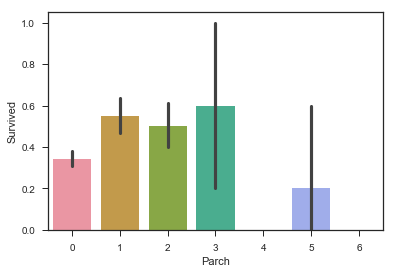

In [672]:
#la probabilité de survie en fonction du lien parent enfant
sns.barplot(x="Parch",y="Survived", data=df_titanic)

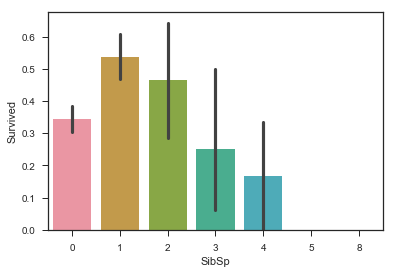

In [673]:
#la probabilité de survie par rapport au nombre de personnes qui composent une famille
sns.barplot(x="SibSp",y="Survived", data=df_titanic)

Traiter la colonne Name de df_titanic en regroupant les titres qui signifient la même chose d'une part, puis en créant des colonnes pour chaque titre et enfin convertir en nombre la correspondance de chaque colonne pour pouvoir l'intégrer dans le calcul

In [674]:
df_titanic['title']=df_titanic['Name']
df_titanic['title']=df_titanic['title'].str.extract('([a-zA-Z)]+)\.',expand=False).str.strip()

print(df_titanic['title'])

tx_titanic['title']=tx_titanic['Name']
tx_titanic['title']=tx_titanic['title'].str.extract('([a-zA-Z)]+)\.',expand=False).str.strip()

#fonction qui regroupe les titres de la même signification
def replace_word (maVal):
    Monsieur=('Mr','Sir')
    Madame=('Mrs','Mme')
    Mademoiselle=('Miss','Mlle','Ms')
    if maVal  in Monsieur: return 'Mr'
    elif maVal in Madame:  return 'Mrs'
    elif maVal in Mademoiselle:  return 'Miss'
    else: return maVal
        
 #fonction qui crée une colonne dans le tableau pour chaque titre en remplaçant le titre par 1 et les autres par 0    
    
def num_title(maVal):
    l=('Mr','Mrs','Miss','Master','Dr','Rev','Col','Major','Countess','Capt','Don','Jonkheer','Sir','Lady')
    for i in l:
        if i==maVal: return '1'
        else: return '0'

    


df_titanic['title']=df_titanic['title'].apply(replace_word)
tx_titanic['title']=tx_titanic['title'].apply(replace_word)

liste=('Mr','Mrs','Miss','Master','Dr','Rev','Col','Major','Countess','Capt','Don','Jonkheer','Sir','Lady')
for i in liste:
    df_titanic['title_%s'%(i)]=df_titanic['title']
    tx_titanic['title_%s'%(i)]=tx_titanic['title'] 
    df_titanic['title_%s'%(i)]=df_titanic['title_%s'%(i)].apply(num_title)
    tx_titanic['title_%s'%(i)]=df_titanic['title_%s'%(i)].apply(num_title)



#df_titanic['title']=df_titanic['title'].str.replace('Mrs','Mme')
#df_titanic['title']=df_titanic['title'].str.replace('Ms','Mme')

#df_titanic['title_Mr']=df_titanic[df_titanic['title']!='Mr']='NaN'

le=preprocessing.LabelEncoder()
#df_titanic['num_title']=le.fit_transform(df_titanic['title'])
#df_titanic['num_title'].unique()

#tx_titanic['num_title']=le.fit_transform(tx_titanic['title'])
#df_titanic['num_title'].unique()

df_titanic

0          Mr
1         Mrs
2        Miss
3         Mrs
4          Mr
5          Mr
6          Mr
7      Master
8         Mrs
9         Mrs
10       Miss
11       Miss
12         Mr
13         Mr
14       Miss
15        Mrs
16     Master
17         Mr
18        Mrs
19        Mrs
20         Mr
21         Mr
22       Miss
23         Mr
24       Miss
25        Mrs
26         Mr
27         Mr
28       Miss
29         Mr
        ...  
861        Mr
862       Mrs
863      Miss
864        Mr
865       Mrs
866      Miss
867        Mr
868        Mr
869    Master
870        Mr
871       Mrs
872        Mr
873        Mr
874       Mrs
875      Miss
876        Mr
877        Mr
878        Mr
879       Mrs
880       Mrs
881        Mr
882      Miss
883        Mr
884        Mr
885       Mrs
886       Rev
887      Miss
888      Miss
889        Mr
890        Mr
Name: title, Length: 891, dtype: object


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,title_Dr,title_Rev,title_Col,title_Major,title_Countess,title_Capt,title_Don,title_Jonkheer,title_Sir,title_Lady
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,1,1,1,1,1,1,1,1,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,0,0,0,0,0,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,0,0,0,0,0,0,0,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,0,0,0,0,0,0,0,0,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,1,1,1,1,1,1,1,1,1,1
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,...,1,1,1,1,1,1,1,1,1,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,...,1,1,1,1,1,1,1,1,1,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,...,0,0,0,0,0,0,0,0,0,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,...,0,0,0,0,0,0,0,0,0,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,...,0,0,0,0,0,0,0,0,0,0


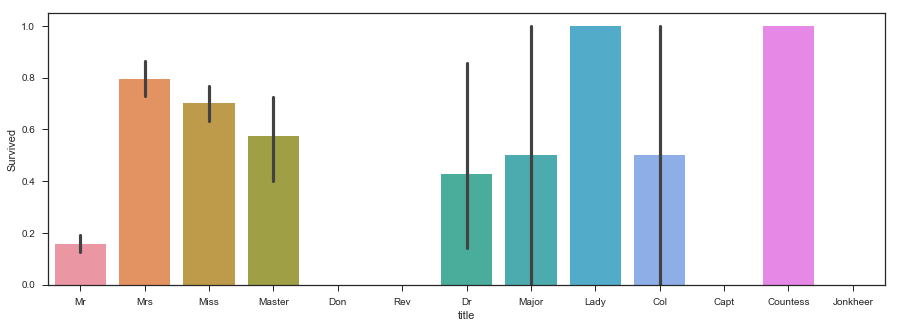

In [675]:
plt.subplots(figsize=(15,5))
sns.barplot(x="title",y="Survived", data=df_titanic)

traiter la colonne 'Embarked' en supprimant les NaN et vérifier les NaN sur le fichier text(tx_titanic), faire le même traitement s'il y en a

In [676]:
print(df_titanic['Embarked'].unique())
print(tx_titanic['Embarked'].unique())

['S' 'C' 'Q' nan]
['Q' 'S' 'C']


In [677]:
df_titanic['Embarked'].fillna(value='X', inplace=True)

In [678]:
#df_titanic['num_Embarked']=df_titanic['Embarked']
#df_titanic['num_Embarked']=df_titanic['num_Embarked'].map({'S':1,'C':2,'Q':3,'X':0}).astype(int)
#df_titanic['Embarked'].unique()
def num_Embarked(maVal):
    l=('S','C','Q','X')
    for i in l:
        if i==maVal: return '1'
        else: return '0'

liste=('S','C','Q','X')
for i in liste:
    df_titanic['num_Embarked_%s'%(i)]=df_titanic['Embarked'].apply(num_Embarked)
    tx_titanic['num_Embarked_%s'%(i)]=tx_titanic['Embarked'].apply(num_Embarked)
df_titanic.columns
#apply(lambda x : mafonction(x,maListe))

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'title', 'title_Mr',
       'title_Mrs', 'title_Miss', 'title_Master', 'title_Dr', 'title_Rev',
       'title_Col', 'title_Major', 'title_Countess', 'title_Capt', 'title_Don',
       'title_Jonkheer', 'title_Sir', 'title_Lady', 'num_Embarked_S',
       'num_Embarked_C', 'num_Embarked_Q', 'num_Embarked_X'],
      dtype='object')

In [679]:
tx_titanic['num_Embarked']=tx_titanic['Embarked']
tx_titanic['num_Embarked']=tx_titanic['num_Embarked'].map({'S':1,'C':2,'Q':3,'X':0}).astype(int)


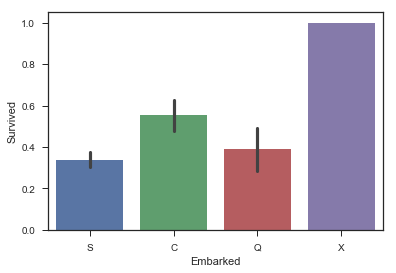

In [680]:
sns.barplot(x="Embarked",y="Survived", data=df_titanic)


supprimer les colonnes qui ne servent pas Cabin,Ticket

In [681]:
del(df_titanic['Cabin'])

In [682]:
del(tx_titanic['Cabin'])

In [683]:
del(df_titanic['Ticket'])

In [684]:
del(tx_titanic['Ticket'])

vérifier le contenu de la colonne 'Fare

In [685]:
print(df_titanic['Fare'].unique())
print(tx_titanic['Fare'].unique())

[  7.25    71.2833   7.925   53.1      8.05     8.4583  51.8625  21.075
  11.1333  30.0708  16.7     26.55    31.275    7.8542  16.      29.125
  13.      18.       7.225   26.       8.0292  35.5     31.3875 263.
   7.8792   7.8958  27.7208 146.5208   7.75    10.5     82.1708  52.
   7.2292  11.2417   9.475   21.      41.5792  15.5     21.6792  17.8
  39.6875   7.8     76.7292  61.9792  27.75    46.9     80.      83.475
  27.9     15.2458   8.1583   8.6625  73.5     14.4542  56.4958   7.65
  29.      12.475    9.       9.5      7.7875  47.1     15.85    34.375
  61.175   20.575   34.6542  63.3583  23.      77.2875   8.6542   7.775
  24.15     9.825   14.4583 247.5208   7.1417  22.3583   6.975    7.05
  14.5     15.0458  26.2833   9.2167  79.2      6.75    11.5     36.75
   7.7958  12.525   66.6      7.3125  61.3792   7.7333  69.55    16.1
  15.75    20.525   55.      25.925   33.5     30.6958  25.4667  28.7125
   0.      15.05    39.      22.025   50.       8.4042   6.4958  10.4625
  1

nettoyer les NaN dans la collone 'Fare' de tx_titanic

In [686]:
tx_titanic['Fare'].fillna(value=tx_titanic['Fare'].median(), inplace=True)

print(tx_titanic['Fare'].unique())


[  7.8292   7.       9.6875   8.6625  12.2875   9.225    7.6292  29.
   7.2292  24.15     7.8958  26.      82.2667  61.175   27.7208  12.35
   7.225    7.925   59.4      3.1708  31.6833  61.3792 262.375   14.5
  61.9792  30.5     21.6792  31.5     20.575   23.45    57.75     8.05
   9.5     56.4958  13.4167  26.55     7.85    13.      52.5542  29.7
   7.75    76.2917  15.9     60.      15.0333  23.     263.      15.5792
  29.125    7.65    16.1     13.5      7.725   21.       7.8792  42.4
  28.5375 211.5     25.7     15.2458 221.7792  10.7083  14.4542  13.9
   7.775   52.       7.7958  78.85     7.8542  55.4417   8.5167  22.525
   7.8208   8.7125  15.0458   7.7792  31.6792   7.2833   6.4375  16.7
  75.2417  15.75     7.25    23.25    28.5     25.4667  46.9    151.55
  18.      51.8625  83.1583  12.1833  31.3875   7.55    13.775    7.7333
  22.025   50.4958  34.375    8.9625  39.      36.75    53.1    247.5208
  16.      69.55    32.5    134.5     10.5      8.1125  15.5     14.4
 227.52

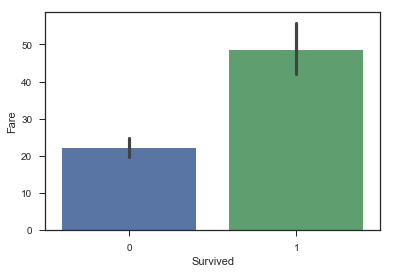

In [687]:

sns.barplot(y="Fare",x="Survived", data=df_titanic)


nettoyer la colonne Age en remplaçant tous les NaN par la moyenne des âges par exemple

In [688]:
df_titanic['Age'].fillna(value=train_titanic['Age'].mean(), inplace=True)

In [689]:
tx_titanic['Age'].fillna(value=tx_titanic['Age'].mean(), inplace=True)

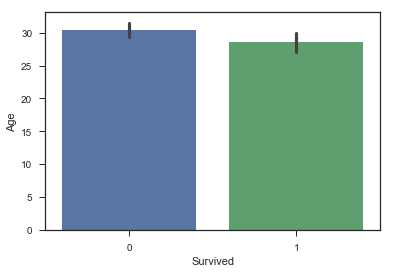

In [690]:
sns.barplot(y="Age",x="Survived", data=df_titanic)

Donner une valeur numérique au sexe pour le traitement des données, 'female': 1, 'male': 2

In [691]:
df_titanic['valeur_sex']=df_titanic['Sex']

df_titanic['valeur_sex'] = df_titanic['valeur_sex'].map( {'female': 0, 'male': 1} ).astype(int)

In [692]:
tx_titanic['valeur_sex']=tx_titanic['Sex']
tx_titanic['valeur_sex']=tx_titanic['valeur_sex'].map({'female':0,'male':1}).astype(int)

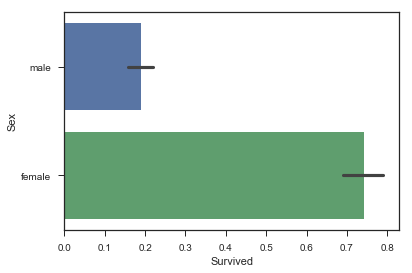

In [693]:
sns.barplot(y="Sex",x="Survived", data=df_titanic)

In [694]:
# je récupère PassengerId
PassengerId=tx_titanic["PassengerId"].tolist()


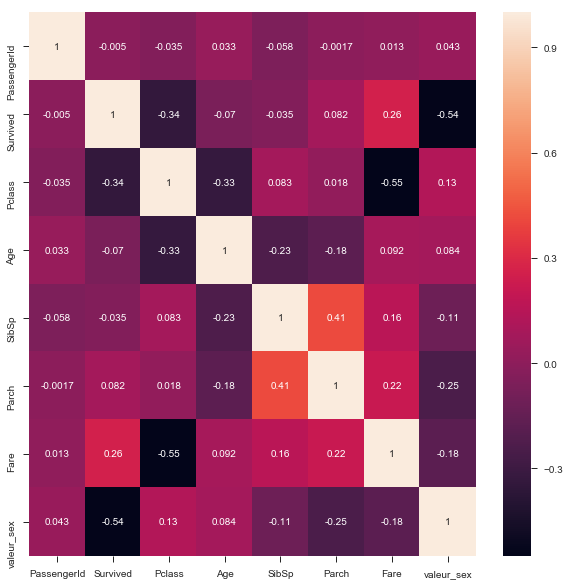

In [695]:
plt.subplots(figsize=(10,10))
sns.heatmap(df_titanic.corr(), annot=True);

In [696]:
print(x.shape)
y.shape

(891, 24)


(891,)

In [701]:
model = linear_model.LogisticRegression()
x=df_titanic[['Pclass',"Age",'SibSp','Parch','valeur_sex','Fare','num_Embarked_S',
       'num_Embarked_C', 'num_Embarked_Q', 'num_Embarked_X','title_Mr', 'title_Mrs',
       'title_Miss', 'title_Master', 'title_Dr', 'title_Rev', 'title_Col',
       'title_Major', 'title_Countess', 'title_Capt', 'title_Don',
       'title_Jonkheer', 'title_Sir', 'title_Lady',]]
y=df_titanic['Survived']
X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.2)
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)
model.fit(X_train, y_train)
y_valid=model.predict(X_test)
#train_score=model.score(X_train, y_train)
train_score=model.score(X_train, y_train)
test_score=model.score(X_test, y_test)
print("train score :%s ,test score :%s" %(train_score,test_score))


(712, 24) (712,) (179, 24) (179,)
train score :0.8117977528089888 ,test score :0.8212290502793296


In [698]:
X_pred=tx_titanic[['Pclass',"Age",'SibSp','Parch','valeur_sex','Fare','num_Embarked']]

df_bla=pd.DataFrame([y_valid, y_test])
df_bla

,0,1,2,3,4,5,6,7,8,9,...,169,170,171,172,173,174,175,176,177,178
0,0,0,0,1,0,0,0,0,1,0,...,0,1,0,0,1,0,0,0,0,1
1,1,0,0,1,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1


In [699]:

submission = pd.DataFrame({
        "PassengerId": tx_titanic["PassengerId"],
        "Survived": y_pred
    })
submission.to_csv('data_titanic.csv', index=False)
print('Exported')

Exported
